In [4]:
import tensorflow as tf
import numpy as np
print(tf.__version__)

2.8.0


In [5]:
a = np.arange(50)
a = a.reshape(-1, 1)
a.shape
a = np.arange(50)[:, np.newaxis]
a.shape

(50, 1)

In [6]:
position=50
# a = tf.range(position, dtype=tf.float32)
# print(a)
# print(a.numpy())
# print(a.shape)

a = tf.range(position, dtype=tf.float32)[:, tf.newaxis]
print(a.shape)
# print(a)

(50, 1)


In [7]:
d_model = 128
i = tf.range(d_model, dtype=tf.float32)
print(i.shape)
i = i[tf.newaxis, :]
print(i.shape)
print(i)

(128,)
(1, 128)
tf.Tensor(
[[  0.   1.   2.   3.   4.   5.   6.   7.   8.   9.  10.  11.  12.  13.
   14.  15.  16.  17.  18.  19.  20.  21.  22.  23.  24.  25.  26.  27.
   28.  29.  30.  31.  32.  33.  34.  35.  36.  37.  38.  39.  40.  41.
   42.  43.  44.  45.  46.  47.  48.  49.  50.  51.  52.  53.  54.  55.
   56.  57.  58.  59.  60.  61.  62.  63.  64.  65.  66.  67.  68.  69.
   70.  71.  72.  73.  74.  75.  76.  77.  78.  79.  80.  81.  82.  83.
   84.  85.  86.  87.  88.  89.  90.  91.  92.  93.  94.  95.  96.  97.
   98.  99. 100. 101. 102. 103. 104. 105. 106. 107. 108. 109. 110. 111.
  112. 113. 114. 115. 116. 117. 118. 119. 120. 121. 122. 123. 124. 125.
  126. 127.]], shape=(1, 128), dtype=float32)


In [8]:
tf.pow(2,3)

<tf.Tensor: shape=(), dtype=int32, numpy=8>

In [9]:
i = [1,2,3,4]
tf.pow(2,i)

<tf.Tensor: shape=(4,), dtype=int32, numpy=array([ 2,  4,  8, 16])>

In [10]:
x = tf.constant([[2, 2], 
                 [3, 3]])
y = tf.constant([[8, 16], 
                 [2, 3]])
tf.pow(x, y)

<tf.Tensor: shape=(2, 2), dtype=int32, numpy=
array([[  256, 65536],
       [    9,    27]])>

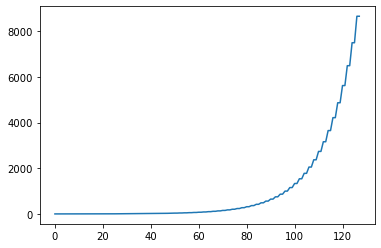

In [11]:
import matplotlib.pyplot as plt
d_model = 128
i=tf.range(d_model, dtype=tf.float32)[tf.newaxis, :] # (1,128)
i // 2
2 * (i // 2)
tf.pow(10000,(2 * (i // 2)))
(2 * (i // 2)) / tf.cast(d_model, tf.float32)
y = tf.pow(10000, (2 * (i // 2)) / tf.cast(d_model, tf.float32))
i
plt.plot(i[0],y[0])  
plt.show()

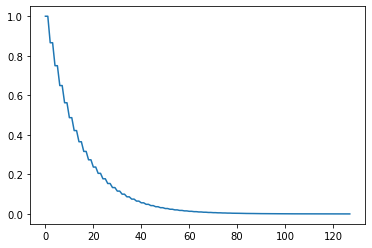

In [12]:
import matplotlib.pyplot as plt
import numpy as np
d_model=128
angles = 1 / tf.pow(10000, (2 * (i // 2)) / tf.cast(d_model, tf.float32))
# print(angles.shape)
# print(angles)

x = i[0].numpy()
# print(x)
y = angles[0].numpy()
# print(y)

plt.plot(x, y)
plt.show()

In [13]:
a = np.arange(1,5)
# print(a.shape)
a = np.arange(1,5).reshape(4,1)
# print(a.shape)
b = 3
c = a*b  # (4,1)*() => (4,1)(4,1)
print(a)
print(c)

[[1]
 [2]
 [3]
 [4]]
[[ 3]
 [ 6]
 [ 9]
 [12]]


In [14]:
a = np.arange(1,5).reshape(4,1)
b = np.array([3])
c = a*b  # (4,1)*(1,) => (4,1)*(4,1) => (4,1)
print(a)
print(c)

[[1]
 [2]
 [3]
 [4]]
[[ 3]
 [ 6]
 [ 9]
 [12]]


In [15]:
a = np.arange(1,13).reshape(4,3)
b = np.array([[3,],
              [3,],
              [3,],
              [3,]])
c = a*b  # (4,3)*(4,1) => (4,3)*(4,3)
print(a)
print(c)

[[ 1  2  3]
 [ 4  5  6]
 [ 7  8  9]
 [10 11 12]]
[[ 3  6  9]
 [12 15 18]
 [21 24 27]
 [30 33 36]]


In [16]:
a = np.arange(1,4).reshape(1,3)
print(a)
b = np.array([[0],
              [1],
              [2],
              [3]])
print(b)
c = a*b  # (1,3)*(4,1) => (4,3)(4,3)

print(c)

[[1 2 3]]
[[0]
 [1]
 [2]
 [3]]
[[0 0 0]
 [1 2 3]
 [2 4 6]
 [3 6 9]]


In [17]:
print(tf.math.sin(90.))

tf.Tensor(0.89399666, shape=(), dtype=float32)


In [18]:
print(tf.math.sin(90.*np.pi/180))

tf.Tensor(1.0, shape=(), dtype=float32)


In [19]:
print(tf.math.sin(1.))

tf.Tensor(0.841471, shape=(), dtype=float32)


In [20]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np

class PositionalEncoding(tf.keras.layers.Layer):
    def __init__(self, position, d_model):
#         print("PositionalEncoding.__init__()", position, d_model)
        super(PositionalEncoding, self).__init__()
        self.pos_encoding = self.positional_encoding(position, d_model)

    def get_angles(self, position, i, d_model):
#         print("PositionalEncoding.get_angles()")
#         print(position.shape)  # (50,1)
#         print(i.shape)         # (1,128)
#         print(d_model)         # 128
        angles = 1 / tf.pow(10000, (2 * (i // 2)) / tf.cast(d_model, tf.float32))
#         print(angles.shape)  # (1,128)
#         print(angles)
        return position * angles    #   (50,1)*(1,128) => (50,128)*(50,128) => (50,128)

    def positional_encoding(self, position, d_model):
#         print("PositionalEncoding.positional_encoding()", position, d_model)
        angle_rads = self.get_angles(
            position=tf.range(position, dtype=tf.float32)[:, tf.newaxis],  # (50,1)
            i=tf.range(d_model, dtype=tf.float32)[tf.newaxis, :],          # (1,128)
            d_model=d_model)

#         print(angle_rads[:10,:10])
#         print(angle_rads.shape)  # (50,128)
        
#         print(angle_rads[:10, 0:11:2])
#         print(angle_rads[:, 0::2].shape)
        
        # 배열의 짝수 인덱스(2i)에는 사인 함수 적용
        sines = tf.math.sin(angle_rads[:, 0::2])
#         print(sines[:10,:10])
#         print(sines.shape)
        
        # 배열의 홀수 인덱스(2i+1)에는 코사인 함수 적용
        cosines = tf.math.cos(angle_rads[:, 1::2])
#         print(cosines[:10,:10])
#         print(cosines.shape)

        pos_encoding = tf.concat([sines, cosines], axis=-1)
#         print(pos_encoding.shape)
#         print(pos_encoding[:10,:10])
        pos_encoding = pos_encoding[tf.newaxis, ...]
#         print(pos_encoding.shape)  # (1, 50,128)
        return tf.cast(pos_encoding, tf.float32)

    def call(self, inputs):  # (1,40,128)
        return inputs + self.pos_encoding[:, :tf.shape(inputs)[1], :] # (1,40,128)+(1,40,128)

(1, 50, 128)
tf.Tensor(
[[[ 0.          0.          0.          0.          0.
    0.          0.          0.          0.          0.        ]
  [ 0.841471    0.7617204   0.68156135  0.604694    0.53316844
    0.46794808  0.40930894  0.35711193  0.3109836   0.27043223]
  [ 0.90929747  0.98704624  0.99748     0.9632266   0.9021307
    0.82710385  0.7469036   0.6671291   0.5911271   0.52071136]
  [ 0.14112     0.5173059   0.7782725   0.9296448   0.9932532
    0.9939678   0.95363444  0.8891674   0.8126489   0.732186  ]
  [-0.7568025  -0.31671533  0.14153895  0.5176193   0.7784717
    0.92974603  0.9932807   0.9939451   0.95358074  0.88909674]
  [-0.9589243  -0.9277093  -0.5711271  -0.10512096  0.32393527
    0.64936954  0.85889596  0.9676446   0.99994653  0.97975016]
  [-0.2794155  -0.8854214  -0.97739613 -0.6850681  -0.23036753
    0.21802224  0.5740256   0.81373405  0.9471482   0.9973907 ]
  [ 0.6569866  -0.21963017 -0.8593135  -0.98613477 -0.7137213
   -0.2640126   0.18858095  0.552511

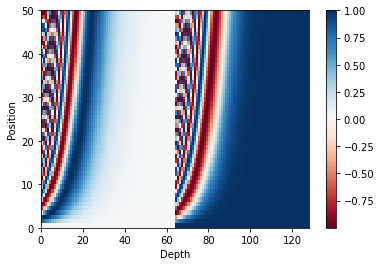

In [21]:
sample_pos_encoding = PositionalEncoding(50, 128)
print(sample_pos_encoding)
print(sample_pos_encoding.pos_encoding.shape)     # (1,50,128)
                                                  # (N,T,D)
                                            # tf.shape(inputs)[1]
print(sample_pos_encoding.pos_encoding[:, :10, :10])

plt.pcolormesh(sample_pos_encoding.pos_encoding.numpy()[0], cmap='RdBu')
plt.xlabel('Depth')
plt.xlim((0, 128))
plt.ylabel('Position')
plt.colorbar()
plt.show()

In [22]:
N=1
T=50
D=128
a = np.arange(N*T*D).reshape(N,T,D)
inputs = tf.constant(a, dtype = tf.float32)
result = sample_pos_encoding(inputs)
print(result.shape)
# print(result)

(1, 50, 128)


In [23]:
query = tf.constant(np.arange(6).reshape(2,3),dtype=tf.float32)
print(query)

key = tf.constant(np.ones((2,3)),dtype=tf.float32)
print(key)

matmul_qk = tf.matmul(query, key, transpose_b=True)
print(matmul_qk.shape)
print("matmul_qk=", matmul_qk)

tf.Tensor(
[[0. 1. 2.]
 [3. 4. 5.]], shape=(2, 3), dtype=float32)
tf.Tensor(
[[1. 1. 1.]
 [1. 1. 1.]], shape=(2, 3), dtype=float32)
(2, 2)
matmul_qk= tf.Tensor(
[[ 3.  3.]
 [12. 12.]], shape=(2, 2), dtype=float32)


In [24]:
query = tf.constant(np.arange(12).reshape(2,2,3),dtype=tf.float32)
print(query)

key = tf.constant(np.ones((2,2,3)),dtype=tf.float32)
print(key)

matmul_qk = tf.matmul(query, key, transpose_b=True)
print(matmul_qk.shape)
print("matmul_qk=", matmul_qk)

tf.Tensor(
[[[ 0.  1.  2.]
  [ 3.  4.  5.]]

 [[ 6.  7.  8.]
  [ 9. 10. 11.]]], shape=(2, 2, 3), dtype=float32)
tf.Tensor(
[[[1. 1. 1.]
  [1. 1. 1.]]

 [[1. 1. 1.]
  [1. 1. 1.]]], shape=(2, 2, 3), dtype=float32)
(2, 2, 2)
matmul_qk= tf.Tensor(
[[[ 3.  3.]
  [12. 12.]]

 [[21. 21.]
  [30. 30.]]], shape=(2, 2, 2), dtype=float32)


In [25]:
query = tf.constant(np.arange(24).reshape(1,2,3,4),dtype=tf.float32)
print(query)

key = tf.constant(np.ones((1,2,3,4)),dtype=tf.float32)
print(key)

matmul_qk = tf.matmul(query, key, transpose_b=True)
print(matmul_qk.shape)
print("matmul_qk=", matmul_qk)

tf.Tensor(
[[[[ 0.  1.  2.  3.]
   [ 4.  5.  6.  7.]
   [ 8.  9. 10. 11.]]

  [[12. 13. 14. 15.]
   [16. 17. 18. 19.]
   [20. 21. 22. 23.]]]], shape=(1, 2, 3, 4), dtype=float32)
tf.Tensor(
[[[[1. 1. 1. 1.]
   [1. 1. 1. 1.]
   [1. 1. 1. 1.]]

  [[1. 1. 1. 1.]
   [1. 1. 1. 1.]
   [1. 1. 1. 1.]]]], shape=(1, 2, 3, 4), dtype=float32)
(1, 2, 3, 3)
matmul_qk= tf.Tensor(
[[[[ 6.  6.  6.]
   [22. 22. 22.]
   [38. 38. 38.]]

  [[54. 54. 54.]
   [70. 70. 70.]
   [86. 86. 86.]]]], shape=(1, 2, 3, 3), dtype=float32)


In [26]:
query = tf.constant(np.arange(48).reshape(2,2,3,4),dtype=tf.float32)
print(query)

key = tf.constant(np.ones((2,2,3,4)),dtype=tf.float32)
print(key)

matmul_qk = tf.matmul(query, key, transpose_b=True)
print(matmul_qk.shape)
print("matmul_qk=", matmul_qk)

tf.Tensor(
[[[[ 0.  1.  2.  3.]
   [ 4.  5.  6.  7.]
   [ 8.  9. 10. 11.]]

  [[12. 13. 14. 15.]
   [16. 17. 18. 19.]
   [20. 21. 22. 23.]]]


 [[[24. 25. 26. 27.]
   [28. 29. 30. 31.]
   [32. 33. 34. 35.]]

  [[36. 37. 38. 39.]
   [40. 41. 42. 43.]
   [44. 45. 46. 47.]]]], shape=(2, 2, 3, 4), dtype=float32)
tf.Tensor(
[[[[1. 1. 1. 1.]
   [1. 1. 1. 1.]
   [1. 1. 1. 1.]]

  [[1. 1. 1. 1.]
   [1. 1. 1. 1.]
   [1. 1. 1. 1.]]]


 [[[1. 1. 1. 1.]
   [1. 1. 1. 1.]
   [1. 1. 1. 1.]]

  [[1. 1. 1. 1.]
   [1. 1. 1. 1.]
   [1. 1. 1. 1.]]]], shape=(2, 2, 3, 4), dtype=float32)
(2, 2, 3, 3)
matmul_qk= tf.Tensor(
[[[[  6.   6.   6.]
   [ 22.  22.  22.]
   [ 38.  38.  38.]]

  [[ 54.  54.  54.]
   [ 70.  70.  70.]
   [ 86.  86.  86.]]]


 [[[102. 102. 102.]
   [118. 118. 118.]
   [134. 134. 134.]]

  [[150. 150. 150.]
   [166. 166. 166.]
   [182. 182. 182.]]]], shape=(2, 2, 3, 3), dtype=float32)


In [210]:
def scaled_dot_product_attention(query, key, value, mask):
    # query 크기 : (batch_size, num_heads, query의 문장 길이, d_model/num_heads)
    # key 크기 : (batch_size, num_heads, key의 문장 길이, d_model/num_heads)
    # value 크기 : (batch_size, num_heads, value의 문장 길이, d_model/num_heads)
    # padding_mask : (batch_size, 1, 1, key의 문장 길이)


    # Q와 K의 곱. 어텐션 스코어 행렬.
    matmul_qk = tf.matmul(query, key, transpose_b=True) # (64,4,40,32)(64,4,32,40) =>  (64,4,40,40)
#     print("matmul_qk.shape =", matmul_qk.shape)         
#     print("matmul_qk =", matmul_qk)
    # 스케일링
    # dk의 루트값으로 나눠준다.
    depth = tf.cast(tf.shape(key)[-1], tf.float32)
#     print("depth=",depth)
    logits = matmul_qk / tf.math.sqrt(depth)
#     print("logits=",logits)

    # 마스킹. 어텐션 스코어 행렬의 마스킹 할 위치에 매우 작은 음수값을 넣는다.
    # 매우 작은 값이므로 소프트맥스 함수를 지나면 행렬의 해당 위치의 값은 0이 된다.
    if mask is not None:
        logits += (mask * -1e9)  # 1 * (-1000000000)  # (1,4,4,4) += (1,1,1,4)
        
#     print("logits=",logits)
        
      

    # 소프트맥스 함수는 마지막 차원인 key의 문장 길이 방향으로 수행된다.
    # attention weight : (batch_size, num_heads, query의 문장 길이, key의 문장 길이)
    attention_weights = tf.nn.softmax(logits, axis=-1)
#     print("attention_weights=",attention_weights)  
#     print("attention_weights.shape =",attention_weights.shape)  # (64,4,40,40)

    
#     print("value.shape=", value.shape)
#     print("value=", value)
    # output : (batch_size, num_heads, query의 문장 길이, d_model/num_heads)
    output = tf.matmul(attention_weights, value) # (64,4,40,40)(64,4,40,32) => (64,4,40,32)
#     print("output.shape =", output.shape) 
#     print("output =", output) 

    return output, attention_weights

In [76]:
np.set_printoptions(suppress=True)
temp_k = tf.constant([[10,0,0],
                      [0,10,0],
                      [0,0,10],
                      [0,0,10]], dtype=tf.float32)  # (4, 3)

temp_v = tf.constant([[   1,0],
                      [  10,0],
                      [ 100,5],
                      [1000,6]], dtype=tf.float32)  # (4, 2)
temp_q = tf.constant([[0, 10, 0]], dtype=tf.float32)  # (1, 3)

In [77]:
temp_out, temp_attn = scaled_dot_product_attention(temp_q, temp_k, temp_v, None)
print(temp_attn) # 어텐션 분포(어텐션 가중치의 나열)
print(temp_out) # 어텐션 값

logits= tf.Tensor([[ 0.       57.735027  0.        0.      ]], shape=(1, 4), dtype=float32)
logits= tf.Tensor([[ 0.       57.735027  0.        0.      ]], shape=(1, 4), dtype=float32)
tf.Tensor([[0. 1. 0. 0.]], shape=(1, 4), dtype=float32)
tf.Tensor([[10.  0.]], shape=(1, 2), dtype=float32)


In [78]:
temp_q = tf.constant([[0, 0, 10]], dtype=tf.float32)
temp_out, temp_attn = scaled_dot_product_attention(temp_q, temp_k, temp_v, None)
print(temp_attn) # 어텐션 분포(어텐션 가중치의 나열)
print(temp_out) # 어텐션 값

logits= tf.Tensor([[ 0.        0.       57.735027 57.735027]], shape=(1, 4), dtype=float32)
logits= tf.Tensor([[ 0.        0.       57.735027 57.735027]], shape=(1, 4), dtype=float32)
tf.Tensor([[0.  0.  0.5 0.5]], shape=(1, 4), dtype=float32)
tf.Tensor([[550.    5.5]], shape=(1, 2), dtype=float32)


In [79]:
temp_q = tf.constant([[0, 0, 10], 
                      [0, 10, 0], 
                      [10, 10, 0]], dtype=tf.float32)  # (3, 3)
temp_out, temp_attn = scaled_dot_product_attention(temp_q, temp_k, temp_v, None)
print(temp_attn) # 어텐션 분포(어텐션 가중치의 나열)
print(temp_out) # 어텐션 값

logits= tf.Tensor(
[[ 0.        0.       57.735027 57.735027]
 [ 0.       57.735027  0.        0.      ]
 [57.735027 57.735027  0.        0.      ]], shape=(3, 4), dtype=float32)
logits= tf.Tensor(
[[ 0.        0.       57.735027 57.735027]
 [ 0.       57.735027  0.        0.      ]
 [57.735027 57.735027  0.        0.      ]], shape=(3, 4), dtype=float32)
tf.Tensor(
[[0.  0.  0.5 0.5]
 [0.  1.  0.  0. ]
 [0.5 0.5 0.  0. ]], shape=(3, 4), dtype=float32)
tf.Tensor(
[[550.    5.5]
 [ 10.    0. ]
 [  5.5   0. ]], shape=(3, 2), dtype=float32)


In [80]:
dense1 = tf.keras.layers.Dense(4)  # weight = (?,4)  , bias = (4,)
# dir(dense1)
print(dense1.weights)
x = tf.constant([[1,2,3]])
print(x.shape)
out = dense1(x)   # (1,3)(3,4)+(4,)
print(dense1.weights)

[]
(1, 3)
[<tf.Variable 'dense_30/kernel:0' shape=(3, 4) dtype=float32, numpy=
array([[-0.12239695,  0.10106027,  0.10537493, -0.4344296 ],
       [ 0.43879783,  0.28196394,  0.3766148 ,  0.39366817],
       [ 0.7430475 ,  0.22961569, -0.19613975, -0.6627714 ]],
      dtype=float32)>, <tf.Variable 'dense_30/bias:0' shape=(4,) dtype=float32, numpy=array([0., 0., 0., 0.], dtype=float32)>]


In [81]:
class AAA():
    def __init__(self):
        print("AAA.__init__()")

class BBB(AAA):
    def __init__(self):
        super(BBB, self).__init__()
        print("BBB.__init__()")        

BBB()

AAA.__init__()
BBB.__init__()


In [82]:
a = np.arange(5)
a = np.reshape(a, (-1,1) )
a

array([[0],
       [1],
       [2],
       [3],
       [4]])

In [83]:
class MultiHeadAttention(tf.keras.layers.Layer):

    def __init__(self, d_model, num_heads, name="multi_head_attention"):
        super(MultiHeadAttention, self).__init__(name=name)
        
#         print("MultiHeadAttention.__init__()")
        self.num_heads = num_heads     # 4
        self.d_model = d_model         # 128

        assert d_model % self.num_heads == 0

        # d_model을 num_heads로 나눈 값.
        # 논문 기준 : 64
        self.depth = d_model // self.num_heads  # 32
#         print("self.depth=", self.depth)

        # WQ, WK, WV에 해당하는 밀집층 정의
        self.query_dense = tf.keras.layers.Dense(units=d_model)  # (?,128)
        self.key_dense = tf.keras.layers.Dense(units=d_model)
        self.value_dense = tf.keras.layers.Dense(units=d_model)

#         print(self.query_dense.weights)
        # WO에 해당하는 밀집층 정의
        self.dense = tf.keras.layers.Dense(units=d_model)  # (128,128)

  # num_heads 개수만큼 q, k, v를 split하는 함수
    def split_heads(self, inputs, batch_size):
#         print("split_heads()")
#         print(inputs.shape)    # (64, 40, 128) => (64, 40, 4, 32)
        inputs = tf.reshape(                                                                                                                     # (batch_size, query의 문장 길이, num_heads, d_model/num_heads)
            inputs, shape=(batch_size, -1, self.num_heads, self.depth))  
                # (batch_size, query의 문장 길이, num_heads, d_model/num_heads)
#         print(inputs.shape)  # (64, 40, 4, 32)
        return tf.transpose(inputs, perm=[0, 2, 1, 3])
                             # (64, 40, 4, 32)
                             # (64, 4, 40, 32)
    
    def call(self, inputs):
        query, key, value, mask = inputs['query'], inputs['key'], inputs[
            'value'], inputs['mask']
        batch_size = tf.shape(query)[0]
#         print("tf.shape(query) = ", tf.shape(query))
#         print("batch_size=", batch_size)

#         print(query[0,0,:10])
#         print(key[0,0,:10])        
        
        # 1. WQ, WK, WV에 해당하는 밀집층 지나기
        # q : (batch_size, query의 문장 길이, d_model)  =>  (64,40,128)
        # k : (batch_size, key의 문장 길이, d_model)
        # v : (batch_size, value의 문장 길이, d_model)
        # 참고) 인코더(k, v)-디코더(q) 어텐션에서는 query 길이와 key, value의 길이는 다를 수 있다.
        query = self.query_dense(query)    # (64,40,128)(128,128) => (64,40,128)
        key = self.key_dense(key)          # (64,40,128)(128,128) => (64,40,128)
        value = self.value_dense(value)    # (64,40,128)(128,128) => (64,40,128)
        
#         print(self.query_dense.weights)
#         print(query.shape)
#         print(key.shape)
#         print(value.shape)
        
#         print(query[0,0,:10])
#         print(key[0,0,:10])

        # 2. 헤드 나누기
        # q : (batch_size, num_heads, query의 문장 길이, d_model/num_heads)
        # k : (batch_size, num_heads, key의 문장 길이, d_model/num_heads)
        # v : (batch_size, num_heads, value의 문장 길이, d_model/num_heads)
        query = self.split_heads(query, batch_size)
        key = self.split_heads(key, batch_size)
        value = self.split_heads(value, batch_size)
#         print(query.shape)
#         print(key.shape)
#         print(value.shape)
        

        # 3. 스케일드 닷 프로덕트 어텐션. 앞서 구현한 함수 사용.
        # (batch_size, num_heads, query의 문장 길이, d_model/num_heads)
        scaled_attention, _ = scaled_dot_product_attention(query, key, value, mask)
#         print('scaled_attention.shape=',scaled_attention.shape)
        # (batch_size, query의 문장 길이, num_heads, d_model/num_heads)
        scaled_attention = tf.transpose(scaled_attention, perm=[0, 2, 1, 3])
#         print('scaled_attention.shape=',scaled_attention.shape)
        
        # 4. 헤드 연결(concatenate)하기
        # (batch_size, query의 문장 길이, d_model)
        concat_attention = tf.reshape(scaled_attention,
                                  (batch_size, -1, self.d_model))
#         print('concat_attention.shape=',concat_attention.shape)  # (64,40,4,32) => (64,40,128)

        # 5. WO에 해당하는 밀집층 지나기
        # (batch_size, query의 문장 길이, d_model)
        outputs = self.dense(concat_attention)  # (64,40,128)(128,128) => (64,40,128)
#         print('outputs.shape=',outputs.shape)

        return outputs

In [60]:
x = tf.constant(np.random.randn(64,40,128))
# inputs = { 'query':x, 'key':x, 'value':x, 'mask':None }
# mha = MultiHeadAttention(128,4)
# mha(inputs)

outputs = MultiHeadAttention(128,4)({ 'query':x, 'key':x, 'value':x, 'mask':None })
print(outputs.shape)

(64, 40, 128)


In [66]:
x = tf.constant([[1, 21, 777, 0, 0]])
print(x.shape)
mask = tf.cast(tf.math.equal(x, 0), tf.float32)    
print(mask.shape)
mask = mask[:, tf.newaxis, tf.newaxis, :] 
print(mask.shape)    
print(mask)

(1, 5)
(1, 5)
(1, 1, 1, 5)
tf.Tensor([[[[0. 0. 0. 1. 1.]]]], shape=(1, 1, 1, 5), dtype=float32)


In [70]:
x = tf.constant([[1, 21, 777, 0, 0],
                 [23, 34, 31, 12, 0]])
print(x.shape)
mask = tf.cast(tf.math.equal(x, 0), tf.float32)    
print(mask.shape)
mask = mask[:, tf.newaxis, tf.newaxis, :] 
print(mask.shape)    
print(mask)

(2, 5)
(2, 5)
(2, 1, 1, 5)
tf.Tensor(
[[[[0. 0. 0. 1. 1.]]]


 [[[0. 0. 0. 0. 1.]]]], shape=(2, 1, 1, 5), dtype=float32)


In [71]:
def create_padding_mask(x):  # (1,5)
    mask = tf.cast(tf.math.equal(x, 0), tf.float32) # (2,5)
    # (batch_size, 1, 1, key의 문장 길이)
#     print(mask) #  [[0, 0, 0, 1, 1],
                #    [1, 1, 0, 0, 0]]  (2,5)
    return mask[:, tf.newaxis, tf.newaxis, :]  # (2,1,1,5)

In [72]:
print(create_padding_mask(tf.constant([[1, 21, 777, 0, 0]])))  # (1,5)

tf.Tensor([[[[0. 0. 0. 1. 1.]]]], shape=(1, 1, 1, 5), dtype=float32)


In [73]:
print(create_padding_mask(tf.constant([[1, 21, 777, 0, 0],
                                       [0, 0, 777, 23, 25]])))  # (2,1,1,5)

tf.Tensor(
[[[[0. 0. 0. 1. 1.]]]


 [[[1. 1. 0. 0. 0.]]]], shape=(2, 1, 1, 5), dtype=float32)


In [91]:
logits = tf.constant([1.,2.,3.,4.,-100000000])
attention_weights = tf.nn.softmax(logits, axis=-1)
print(attention_weights)

tf.Tensor([0.0320586  0.08714432 0.23688284 0.6439142  0.        ], shape=(5,), dtype=float32)


In [88]:
x = tf.constant(np.random.randn(1,4,128))

mask = create_padding_mask(tf.constant([[1, 23, 777, 0]]))  # (1,1,1,4)

outputs = MultiHeadAttention(128,4)({ 'query':x, 'key':x, 'value':x, 'mask':mask })
print(outputs.shape)

logits= tf.Tensor(
[[[[ 1.1950938  -2.1187646   0.7965206  -0.53906345]
   [ 1.5907404   1.2541727   1.7914295   0.7255548 ]
   [-0.9760902  -0.7537416   3.0752857   0.51900095]
   [-0.2272062  -0.5836903  -0.02214977 -0.05993155]]

  [[-0.6097967   0.13491045 -1.7347339  -0.8819026 ]
   [ 0.08453563 -1.0859282   0.11162645  1.595788  ]
   [-1.1667167   0.6091613   0.2874194   0.60050476]
   [ 2.1533718   0.36066413  0.97842664  0.17598261]]

  [[ 0.7021263   0.5120816  -0.8397968   1.1962703 ]
   [ 0.30637467  1.9412186   0.46160787 -0.0244561 ]
   [ 0.14970234 -0.2967584  -0.65657616 -0.54716116]
   [-0.35095602  1.1036812  -0.00140379  0.27430826]]

  [[-0.31480348  0.08028645  0.7318049  -0.24628524]
   [ 0.17853679  1.2193407  -1.0499932   1.2860488 ]
   [-1.2800025   1.2097993   0.71407384  0.38002738]
   [ 1.1906487  -1.0113816   1.5122131   0.40649387]]]], shape=(1, 4, 4, 4), dtype=float32)
logits= tf.Tensor(
[[[[ 1.19509375e+00 -2.11876464e+00  7.96520591e-01 -1.00000000e+09]


In [174]:
# tf.random.set_seed(1)
layer = tf.keras.layers.Dropout(.2, input_shape=(2,))
data = np.arange(1, 11).reshape(5, 2).astype(np.float32)
print(data)

outputs = layer(data, training=True)
print(outputs)

[[ 1.  2.]
 [ 3.  4.]
 [ 5.  6.]
 [ 7.  8.]
 [ 9. 10.]]
tf.Tensor(
[[ 1.25  2.5 ]
 [ 3.75  5.  ]
 [ 6.25  7.5 ]
 [ 8.75  0.  ]
 [11.25 12.5 ]], shape=(5, 2), dtype=float32)


In [191]:
data = tf.constant(np.arange(32).reshape(8, 4) * 10, dtype=tf.float32)
print(data)

m = np.mean(data.numpy(), axis=1)
s = np.std(data.numpy(), axis=1)
print(m, s)

layer = tf.keras.layers.LayerNormalization(axis=1)

output = layer(data)
print(layer.beta)
print(layer.gamma)
print(output)

m = np.mean(output.numpy(), axis=1)
s = np.std(output.numpy(), axis=1)
print(m, s)

tf.Tensor(
[[  0.  10.  20.  30.]
 [ 40.  50.  60.  70.]
 [ 80.  90. 100. 110.]
 [120. 130. 140. 150.]
 [160. 170. 180. 190.]
 [200. 210. 220. 230.]
 [240. 250. 260. 270.]
 [280. 290. 300. 310.]], shape=(8, 4), dtype=float32)
[ 15.  55.  95. 135. 175. 215. 255. 295.] [11.18034 11.18034 11.18034 11.18034 11.18034 11.18034 11.18034 11.18034]
<tf.Variable 'layer_normalization_11/beta:0' shape=(4,) dtype=float32, numpy=array([0., 0., 0., 0.], dtype=float32)>
<tf.Variable 'layer_normalization_11/gamma:0' shape=(4,) dtype=float32, numpy=array([1., 1., 1., 1.], dtype=float32)>
tf.Tensor(
[[-1.3416353  -0.44721177  0.4472118   1.3416353 ]
 [-1.3416353  -0.44721177  0.4472118   1.3416353 ]
 [-1.341635   -0.4472114   0.44721216  1.3416357 ]
 [-1.3416356  -0.447212    0.44721156  1.3416351 ]
 [-1.3416352  -0.44721165  0.44721192  1.3416355 ]
 [-1.3416349  -0.4472113   0.44721228  1.3416358 ]
 [-1.3416345  -0.44721094  0.44721264  1.3416362 ]
 [-1.3416361  -0.4472125   0.4472111   1.3416346 ]], sh

In [206]:
x_i = np.array([1111,2220,300,40,50])
k = len(x_i)
mean_i = sum(x_i[j] for j in range(k)) / k
print(mean_i)
var_i = sum((x_i[j] - mean_i) ** 2 for j in range(k)) / k
print(var_i)

x_i_normalized = (x_i - mean_i) / np.sqrt(var_i + 0.0000001)
print(x_i_normalized)
print(np.mean(x_i_normalized))
print(np.std(x_i_normalized))

gamma=2
beta=3

output_i = x_i_normalized * gamma + beta
print(output_i)
print(np.mean(output_i))
print(np.std(output_i))

744.2
697530.5599999999
[ 0.43918521  1.76703799 -0.53185952 -0.84316855 -0.83119513]
0.0
0.9999999999999283
[3.87837042 6.53407598 1.93628097 1.31366289 1.33760974]
2.9999999999999996
1.9999999999998566


In [207]:
def encoder_layer(dff, d_model, num_heads, dropout, name="encoder_layer"):
    inputs = tf.keras.Input(shape=(None, d_model), name="inputs")   # (None,None,128)

    # 인코더는 패딩 마스크 사용
    padding_mask = tf.keras.Input(shape=(1, 1, None), name="padding_mask")  # (None,1,1,None)

    # 멀티-헤드 어텐션 (첫번째 서브층 / 셀프 어텐션)
    attention = MultiHeadAttention(
        d_model, num_heads, name="attention")({
            'query': inputs, 'key': inputs, 'value': inputs, # Q = K = V
            'mask': padding_mask # 패딩 마스크 사용
        })       
    
#     print('attention.shape=', attention.shape)  # (64,40,128)

    # 드롭아웃 + 잔차 연결과 층 정규화
    attention = tf.keras.layers.Dropout(rate=dropout)(attention)
#     print('attention.shape=', attention.shape)  # (64,40,128)
    attention = tf.keras.layers.LayerNormalization(
        epsilon=1e-6)(inputs + attention)  # (64,40,128) + (64,40,128)
    
#     print('attention.shape=', attention.shape)

    # 포지션 와이즈 피드 포워드 신경망 (두번째 서브층)
    outputs = tf.keras.layers.Dense(units=dff, activation='relu')(attention)  # (64,40,128)(128,512)=>(64,40,512)
    outputs = tf.keras.layers.Dense(units=d_model)(outputs)  # (64,40,512)(512,128)=>(64,40,128)

    # 드롭아웃 + 잔차 연결과 층 정규화
    outputs = tf.keras.layers.Dropout(rate=dropout)(outputs)
    outputs = tf.keras.layers.LayerNormalization(
        epsilon=1e-6)(attention + outputs)  # (64,40,128) + (64,40,128)

    return tf.keras.Model(
        inputs=[inputs, padding_mask], outputs=outputs, name=name)

In [208]:
def encoder(vocab_size, num_layers, dff,
            d_model, num_heads, dropout,
            name="encoder"):
    inputs = tf.keras.Input(shape=(None,), name="inputs")

#     print("inputs.shape=",inputs.shape)  # (None,None)
    # 인코더는 패딩 마스크 사용
    padding_mask = tf.keras.Input(shape=(1, 1, None), name="padding_mask") # (None,1,1,None)
#     print("padding_mask.shape=",padding_mask.shape)

    # 포지셔널 인코딩 + 드롭아웃                                          # (N,T)
    embeddings = tf.keras.layers.Embedding(vocab_size, d_model)(inputs)   # (9000,128) => (N,T,D)
    embeddings *= tf.math.sqrt(tf.cast(d_model, tf.float32))              # (64,40,128)
    embeddings = PositionalEncoding(vocab_size, d_model)(embeddings)      # (64,40,128)
    outputs = tf.keras.layers.Dropout(rate=dropout)(embeddings)

    # 인코더를 num_layers개 쌓기
    for i in range(num_layers):
        outputs = encoder_layer(dff=dff, d_model=d_model, num_heads=num_heads,
          dropout=dropout, name="encoder_layer_{}".format(i),
      )([outputs, padding_mask])
#         print('outputs.shape=',outputs.shape)

    return tf.keras.Model(
        inputs=[inputs, padding_mask], outputs=outputs, name=name)

In [211]:
# 인코더의 테스트

# 인코더의 입력
x = tf.constant(np.arange(64*40).reshape(64,40))  # (N,T)
print(x.shape)

# 인코더의 패딩 마스크
enc_padding_mask = tf.keras.layers.Lambda(
    create_padding_mask, output_shape=(1, 1, 40),
    name='enc_padding_mask')(x)

print(enc_padding_mask.shape)

# 인코더의 출력은 enc_outputs. 디코더로 전달된다.
enc_outputs = encoder(vocab_size=9000, num_layers=2, dff=512,
    d_model=128, num_heads=4, dropout=0.2,)(inputs=[x, enc_padding_mask]) # 인코더의 입력은 입력 문장과 패딩 마스크

print(enc_outputs.shape)

(64, 40)
(64, 1, 1, 40)
(64, 40, 128)


In [ ]:
seq_len=5
a = tf.ones((seq_len, seq_len))
print(a)
print(tf.linalg.band_part(a, -1, 0))
print(1-tf.linalg.band_part(a, -1, 0))

In [ ]:
def create_look_ahead_mask(x):
    seq_len = tf.shape(x)[1]
    print(seq_len)  # 5
    look_ahead_mask = 1 - tf.linalg.band_part(tf.ones((seq_len, seq_len)), -1, 0)
    padding_mask = create_padding_mask(x) # 패딩 마스크도 포함
    return tf.maximum(look_ahead_mask, padding_mask)
#     return look_ahead_mask

In [ ]:
print(create_look_ahead_mask(tf.constant([[5, 4, 1, 0, 0]])))  # (N,T) => (1,5)

In [ ]:
def decoder_layer(dff, d_model, num_heads, dropout, name="decoder_layer"):
    inputs = tf.keras.Input(shape=(None, d_model), name="inputs")
    enc_outputs = tf.keras.Input(shape=(None, d_model), name="encoder_outputs")

    # 디코더는 룩어헤드 마스크(첫번째 서브층)와 패딩 마스크(두번째 서브층) 둘 다 사용.
    look_ahead_mask = tf.keras.Input(
        shape=(1, None, None), name="look_ahead_mask")
    padding_mask = tf.keras.Input(shape=(1, 1, None), name='padding_mask')

    # 멀티-헤드 어텐션 (첫번째 서브층 / 마스크드 셀프 어텐션)
    attention1 = MultiHeadAttention(
        d_model, num_heads, name="attention_1")(inputs={
            'query': inputs, 'key': inputs, 'value': inputs, # Q = K = V
            'mask': look_ahead_mask # 룩어헤드 마스크
        })

    # 잔차 연결과 층 정규화
    attention1 = tf.keras.layers.LayerNormalization(
        epsilon=1e-6)(attention1 + inputs)

    # 멀티-헤드 어텐션 (두번째 서브층 / 디코더-인코더 어텐션)
    attention2 = MultiHeadAttention(
        d_model, num_heads, name="attention_2")(inputs={
            'query': attention1, 'key': enc_outputs, 'value': enc_outputs, # Q != K = V
            'mask': padding_mask # 패딩 마스크
        })

    # 드롭아웃 + 잔차 연결과 층 정규화
    attention2 = tf.keras.layers.Dropout(rate=dropout)(attention2)
    attention2 = tf.keras.layers.LayerNormalization(
        epsilon=1e-6)(attention2 + attention1)

    # 포지션 와이즈 피드 포워드 신경망 (세번째 서브층)
    outputs = tf.keras.layers.Dense(units=dff, activation='relu')(attention2)
    outputs = tf.keras.layers.Dense(units=d_model)(outputs)

    # 드롭아웃 + 잔차 연결과 층 정규화
    outputs = tf.keras.layers.Dropout(rate=dropout)(outputs)
    outputs = tf.keras.layers.LayerNormalization(
        epsilon=1e-6)(outputs + attention2)

    return tf.keras.Model(
        inputs=[inputs, enc_outputs, look_ahead_mask, padding_mask],
        outputs=outputs,
        name=name)

In [ ]:
def decoder(vocab_size, num_layers, dff,
            d_model, num_heads, dropout,
            name='decoder'):
    inputs = tf.keras.Input(shape=(None,), name='inputs')
    enc_outputs = tf.keras.Input(shape=(None, d_model), name='encoder_outputs')

    # 디코더는 룩어헤드 마스크(첫번째 서브층)와 패딩 마스크(두번째 서브층) 둘 다 사용.
    look_ahead_mask = tf.keras.Input(
        shape=(1, None, None), name='look_ahead_mask')
    padding_mask = tf.keras.Input(shape=(1, 1, None), name='padding_mask')

    # 포지셔널 인코딩 + 드롭아웃
    embeddings = tf.keras.layers.Embedding(vocab_size, d_model)(inputs)
    embeddings *= tf.math.sqrt(tf.cast(d_model, tf.float32))
    embeddings = PositionalEncoding(vocab_size, d_model)(embeddings)
    outputs = tf.keras.layers.Dropout(rate=dropout)(embeddings)

    # 디코더를 num_layers개 쌓기
    for i in range(num_layers):
        outputs = decoder_layer(dff=dff, d_model=d_model, num_heads=num_heads,
            dropout=dropout, name='decoder_layer_{}'.format(i),
        )(inputs=[outputs, enc_outputs, look_ahead_mask, padding_mask])

    return tf.keras.Model(
        inputs=[inputs, enc_outputs, look_ahead_mask, padding_mask],
        outputs=outputs,
        name=name)

In [ ]:
def transformer(vocab_size, num_layers, dff,
                  d_model, num_heads, dropout,
                  name="transformer"):

    # 인코더의 입력
    inputs = tf.keras.Input(shape=(None,), name="inputs")

    # 디코더의 입력
    dec_inputs = tf.keras.Input(shape=(None,), name="dec_inputs")

    # 인코더의 패딩 마스크
    enc_padding_mask = tf.keras.layers.Lambda(
        create_padding_mask, output_shape=(1, 1, None),
        name='enc_padding_mask')(inputs)

    # 디코더의 룩어헤드 마스크(첫번째 서브층)
    look_ahead_mask = tf.keras.layers.Lambda(
        create_look_ahead_mask, output_shape=(1, None, None),
        name='look_ahead_mask')(dec_inputs)

    # 디코더의 패딩 마스크(두번째 서브층)
    dec_padding_mask = tf.keras.layers.Lambda(
        create_padding_mask, output_shape=(1, 1, None),
        name='dec_padding_mask')(inputs)

    # 인코더의 출력은 enc_outputs. 디코더로 전달된다.
    enc_outputs = encoder(vocab_size=vocab_size, num_layers=num_layers, dff=dff,
        d_model=d_model, num_heads=num_heads, dropout=dropout,
    )(inputs=[inputs, enc_padding_mask]) # 인코더의 입력은 입력 문장과 패딩 마스크

    # 디코더의 출력은 dec_outputs. 출력층으로 전달된다.
    dec_outputs = decoder(vocab_size=vocab_size, num_layers=num_layers, dff=dff,
        d_model=d_model, num_heads=num_heads, dropout=dropout,
    )(inputs=[dec_inputs, enc_outputs, look_ahead_mask, dec_padding_mask])

    # 다음 단어 예측을 위한 출력층
    outputs = tf.keras.layers.Dense(units=vocab_size, name="outputs")(dec_outputs)

    return tf.keras.Model(inputs=[inputs, dec_inputs], outputs=outputs, name=name)

In [ ]:
small_transformer = transformer(
    vocab_size = 9000,
    num_layers = 4,
    dff = 512,
    d_model = 128,
    num_heads = 4,
    dropout = 0.3,
    name="small_transformer")

tf.keras.utils.plot_model(
    small_transformer, to_file='small_transformer.png', show_shapes=True)

In [ ]:
def loss_function(y_true, y_pred):
    y_true = tf.reshape(y_true, shape=(-1, MAX_LENGTH - 1))

    loss = tf.keras.losses.SparseCategoricalCrossentropy(
        from_logits=True, reduction='none')(y_true, y_pred)

    mask = tf.cast(tf.not_equal(y_true, 0), tf.float32)
    loss = tf.multiply(loss, mask)

    return tf.reduce_mean(loss)

In [ ]:
class CustomSchedule(tf.keras.optimizers.schedules.LearningRateSchedule):

    def __init__(self, d_model, warmup_steps=4000):
        super(CustomSchedule, self).__init__()
        self.d_model = d_model
        self.d_model = tf.cast(self.d_model, tf.float32)
        self.warmup_steps = warmup_steps

    def __call__(self, step):
        arg1 = tf.math.rsqrt(step)
        arg2 = step * (self.warmup_steps**-1.5)

        return tf.math.rsqrt(self.d_model) * tf.math.minimum(arg1, arg2)
sample_learning_rate = CustomSchedule(d_model=128)

plt.plot(sample_learning_rate(tf.range(200000, dtype=tf.float32)))
plt.ylabel("Learning Rate")
plt.xlabel("Train Step")
# Text(0.5, 0, 'Train Step')

#### tensorflow_datasets 처음 설치 시

In [ ]:
!pip install tensorflow_datasets 

#### tensorflow_datasets 업그레이드 시

In [ ]:
!pip3 install --user --upgrade tensorflow_datasets

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import re
import urllib.request
import time
import tensorflow_datasets as tfds
import tensorflow as tf

In [ ]:
print(tf.__version__)

In [ ]:
print(tfds.__version__)

In [ ]:
# urllib.request.urlretrieve("https://raw.githubusercontent.com/songys/Chatbot_data/master/ChatbotData%20.csv", filename="ChatBotData.csv")
train_data = pd.read_csv('ChatBotData.csv')
train_data.head()

In [ ]:
print('챗봇 샘플의 개수 :', len(train_data))

In [ ]:
print(train_data.isnull().sum())

In [ ]:
sentence = re.sub(r"([?.!,])", r" \1 ", "   12시 땡!    ")
sentence = sentence.strip()
print("[%s]"%sentence)

In [ ]:
questions = []
for sentence in train_data['Q']:
    # 구두점에 대해서 띄어쓰기
    # ex) 12시 땡! -> 12시 땡 !
    sentence = re.sub(r"([?.!,])", r" \1 ", sentence)
    sentence = sentence.strip()
    questions.append(sentence)
answers = []
for sentence in train_data['A']:
    # 구두점에 대해서 띄어쓰기
    # ex) 12시 땡! -> 12시 땡 !
    sentence = re.sub(r"([?.!,])", r" \1 ", sentence)
    sentence = sentence.strip()
    answers.append(sentence)

In [ ]:
print(questions[:5])
print(answers[:5])
print(len(questions))

In [ ]:
# 서브워드텍스트인코더를 사용하여 질문, 답변 데이터로부터 단어 집합(Vocabulary) 생성
tokenizer = tfds.deprecated.text.SubwordTextEncoder.build_from_corpus(
    questions + answers, target_vocab_size=2**13)
print(tokenizer.vocab_size)

In [ ]:
# 시작 토큰과 종료 토큰에 대한 정수 부여.
START_TOKEN, END_TOKEN = [tokenizer.vocab_size], [tokenizer.vocab_size + 1]

# 시작 토큰과 종료 토큰을 고려하여 단어 집합의 크기를 + 2
VOCAB_SIZE = tokenizer.vocab_size + 2

In [ ]:
print('시작 토큰 번호 :',START_TOKEN)
print('종료 토큰 번호 :',END_TOKEN)
print('단어 집합의 크기 :',VOCAB_SIZE)

In [ ]:
# 서브워드텍스트인코더 토크나이저의 .encode()를 사용하여 텍스트 시퀀스를 정수 시퀀스로 변환.
print(questions[20])
print('임의의 질문 샘플을 정수 인코딩 : {}'.format(tokenizer.encode(questions[20])))

In [ ]:
# 서브워드텍스트인코더 토크나이저의 .encode()와 .decode() 테스트해보기
# 임의의 입력 문장을 sample_string에 저장
sample_string = questions[20]

# encode() : 텍스트 시퀀스 --> 정수 시퀀스
tokenized_string = tokenizer.encode(sample_string)
print ('정수 인코딩 후의 문장 {}'.format(tokenized_string))

# decode() : 정수 시퀀스 --> 텍스트 시퀀스
original_string = tokenizer.decode(tokenized_string)
print ('기존 문장: {}'.format(original_string))

In [ ]:
for ts in tokenized_string:
    print ('{} ----> {}'.format(ts, tokenizer.decode([ts])))

In [ ]:
# 최대 길이를 40으로 정의
MAX_LENGTH = 40

# 토큰화 / 정수 인코딩 / 시작 토큰과 종료 토큰 추가 / 패딩
def tokenize_and_filter(inputs, outputs):
  tokenized_inputs, tokenized_outputs = [], []

  for (sentence1, sentence2) in zip(inputs, outputs):
#     print(sentence1)
    # encode(토큰화 + 정수 인코딩), 시작 토큰과 종료 토큰 추가
    sentence1 = START_TOKEN + tokenizer.encode(sentence1) + END_TOKEN
    sentence2 = START_TOKEN + tokenizer.encode(sentence2) + END_TOKEN


    tokenized_inputs.append(sentence1)
    tokenized_outputs.append(sentence2)

  # 패딩
  tokenized_inputs = tf.keras.preprocessing.sequence.pad_sequences(
      tokenized_inputs, maxlen=MAX_LENGTH, padding='post')
  tokenized_outputs = tf.keras.preprocessing.sequence.pad_sequences(
      tokenized_outputs, maxlen=MAX_LENGTH, padding='post')

  print(tokenized_inputs[0])

  return tokenized_inputs, tokenized_outputs

In [ ]:
questions, answers = tokenize_and_filter(questions, answers)

In [ ]:
print('질문 데이터의 크기(shape) :', questions.shape)
print('답변 데이터의 크기(shape) :', answers.shape)

In [ ]:
print(questions[0])
print(answers[0])

In [ ]:
BATCH_SIZE = 64
BUFFER_SIZE = 20000

# 디코더의 실제값 시퀀스에서는 시작 토큰을 제거해야 한다.
dataset = tf.data.Dataset.from_tensor_slices((
    {
        'inputs': questions,
        'dec_inputs': answers[:, :-1] # 디코더의 입력. 마지막 패딩 토큰이 제거된다.
    },
    {
        'outputs': answers[:, 1:]  # 맨 처음 토큰이 제거된다. 다시 말해 시작 토큰이 제거된다.
    },
))

dataset = dataset.cache()
dataset = dataset.shuffle(BUFFER_SIZE)
dataset = dataset.batch(BATCH_SIZE)
dataset = dataset.prefetch(tf.data.experimental.AUTOTUNE)
# 임의의 샘플에 대해서 [:, :-1]과 [:, 1:]이 어떤 의미를 가지는지 테스트해본다.
print(answers[0]) # 기존 샘플
print(answers[:1][:, :-1]) # 마지막 패딩 토큰 제거하면서 길이가 39가 된다.
print(answers[:1][:, 1:]) # 맨 처음 토큰이 제거된다. 다시 말해 시작 토큰이 제거된다. 길이는 역시 39가 된다.

In [ ]:
D_MODEL = 256
NUM_LAYERS = 2
NUM_HEADS = 8
DFF = 512
DROPOUT = 0.1

model = transformer(
    vocab_size=VOCAB_SIZE,
    num_layers=NUM_LAYERS,
    dff=DFF,
    d_model=D_MODEL,
    num_heads=NUM_HEADS,
    dropout=DROPOUT)

In [ ]:
learning_rate = CustomSchedule(D_MODEL)

optimizer = tf.keras.optimizers.Adam(
    learning_rate, beta_1=0.9, beta_2=0.98, epsilon=1e-9)

def accuracy(y_true, y_pred):
  # 레이블의 크기는 (batch_size, MAX_LENGTH - 1)
  y_true = tf.reshape(y_true, shape=(-1, MAX_LENGTH - 1))
  return tf.keras.metrics.sparse_categorical_accuracy(y_true, y_pred)

model.compile(optimizer=optimizer, loss=loss_function, metrics=[accuracy])

In [ ]:
EPOCHS = 50
model.fit(dataset, epochs=EPOCHS)

In [ ]:
def evaluate(sentence):
  sentence = preprocess_sentence(sentence)

  sentence = tf.expand_dims(
      START_TOKEN + tokenizer.encode(sentence) + END_TOKEN, axis=0)

  output = tf.expand_dims(START_TOKEN, 0)

  # 디코더의 예측 시작
  for i in range(MAX_LENGTH):
    predictions = model(inputs=[sentence, output], training=False)

    # 현재(마지막) 시점의 예측 단어를 받아온다.
    predictions = predictions[:, -1:, :]
    predicted_id = tf.cast(tf.argmax(predictions, axis=-1), tf.int32)

    # 만약 마지막 시점의 예측 단어가 종료 토큰이라면 예측을 중단
    if tf.equal(predicted_id, END_TOKEN[0]):
      break

    # 마지막 시점의 예측 단어를 출력에 연결한다.
    # 이는 for문을 통해서 디코더의 입력으로 사용될 예정이다.
    output = tf.concat([output, predicted_id], axis=-1)

  return tf.squeeze(output, axis=0)
def predict(sentence):
  prediction = evaluate(sentence)

  predicted_sentence = tokenizer.decode(
      [i for i in prediction if i < tokenizer.vocab_size])

  print('Input: {}'.format(sentence))
  print('Output: {}'.format(predicted_sentence))

  return predicted_sentence
def preprocess_sentence(sentence):
  sentence = re.sub(r"([?.!,])", r" \1 ", sentence)
  sentence = sentence.strip()
  return sentence

In [ ]:
output = predict("날씨가 좋넹.")

In [ ]:
output = predict("고민이 있어")

In [ ]:
output = predict("너무 화가나")

In [ ]:
output = predict("카페갈래?")

In [ ]:
output = predict("게임하고싶당")

In [ ]:
output = predict("게임하자")